In [68]:
#import the libraries
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd
import pickle
import seaborn as sns

import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing
from sklearn import linear_model

### IMPORTING DATA IN CHUNKS BECAUSE SIZE OF DATA IS VERY LARGE

In [3]:
pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
df = pickle.load(pickle_in)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### PREPROCESSING FOR PASSENGER_COUNT

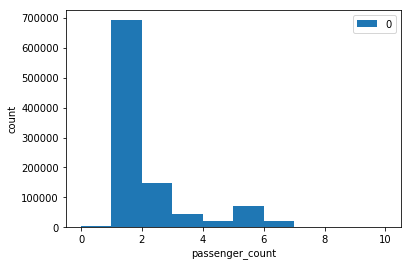

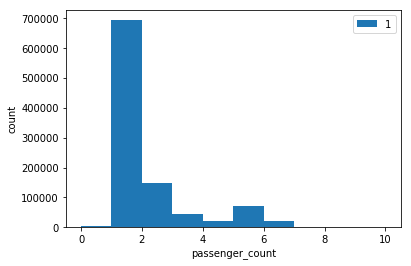

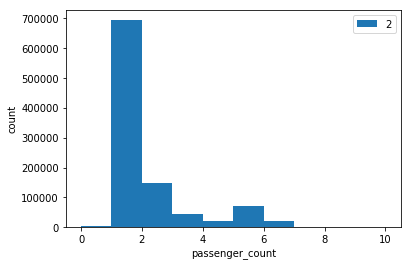

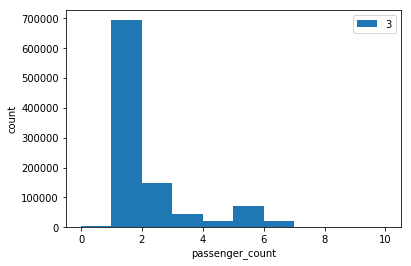

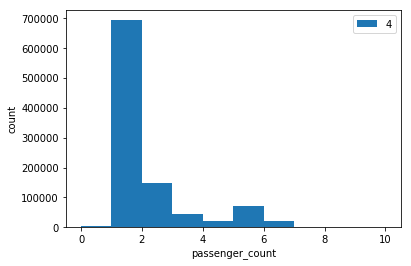

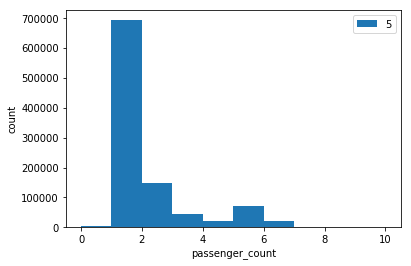

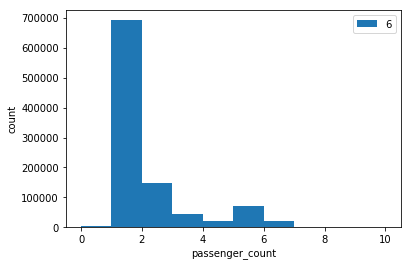

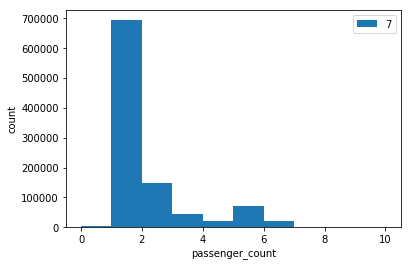

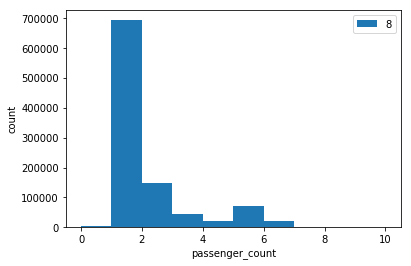

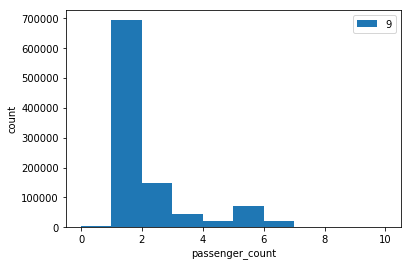

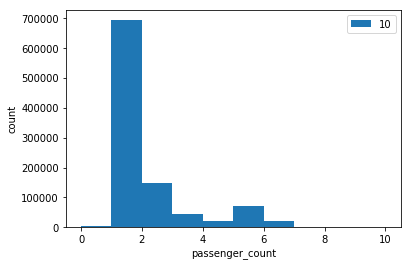

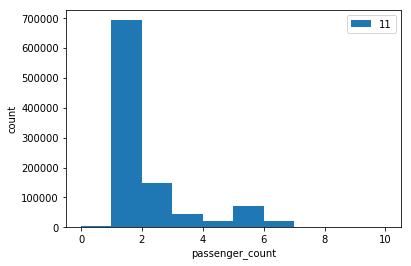

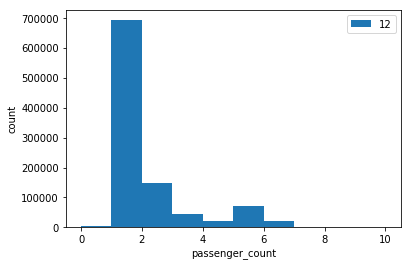

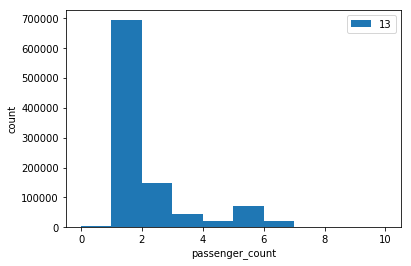

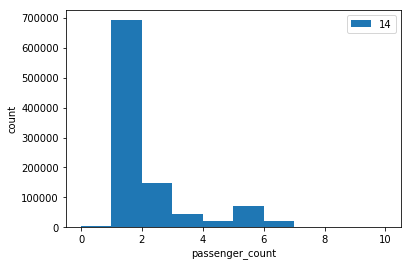

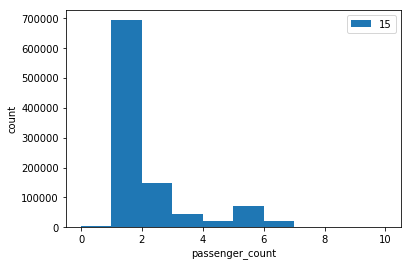

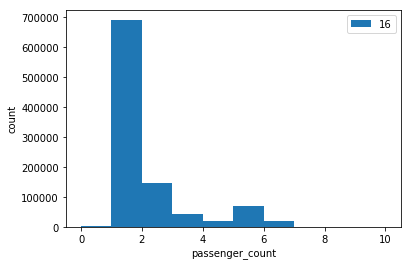

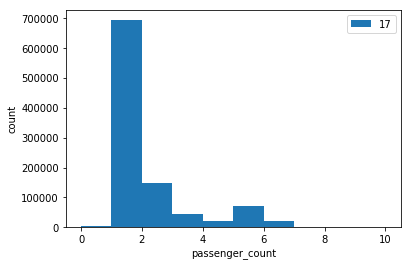

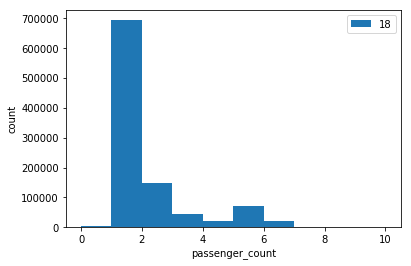

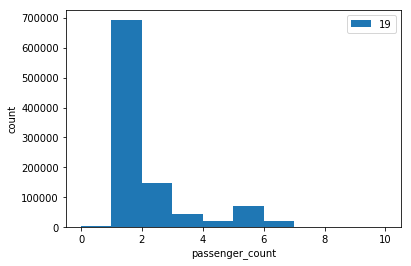

In [38]:
for i in range(0,20):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    plt.hist(df['passenger_count'], range=[0,10], label = str(i))
    plt.xlabel('passenger_count')
    plt.ylabel('count')
    plt.legend()   
    plt.show()
    

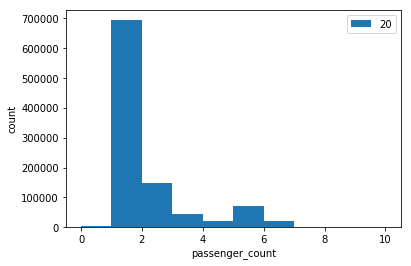

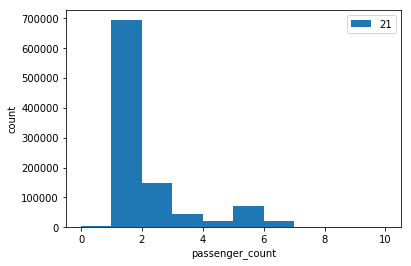

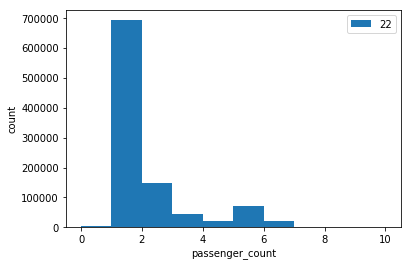

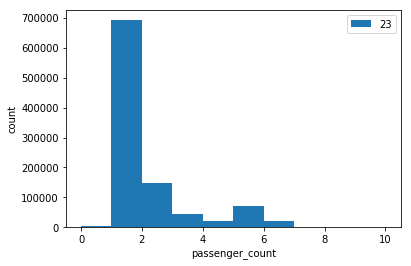

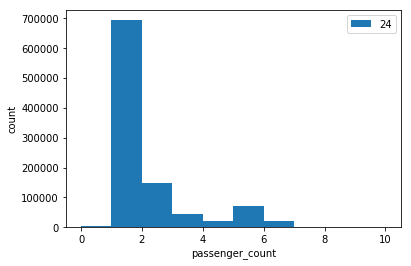

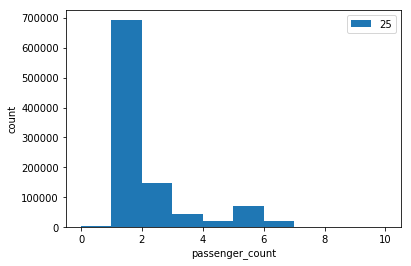

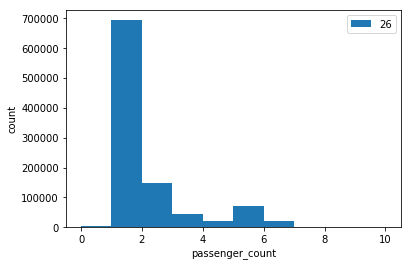

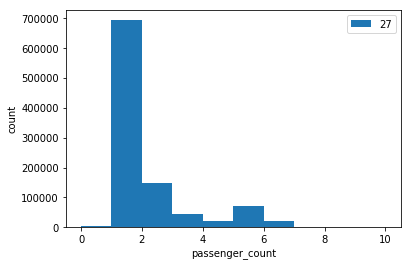

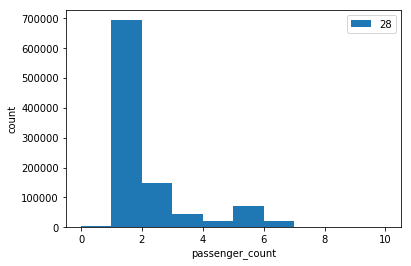

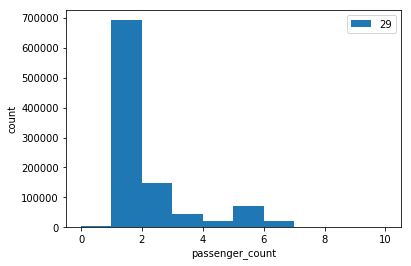

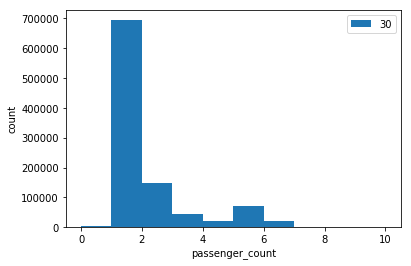

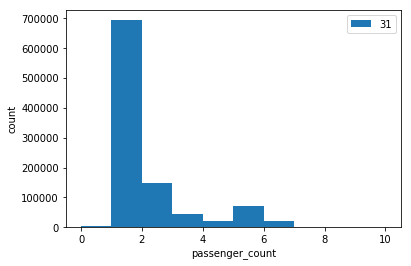

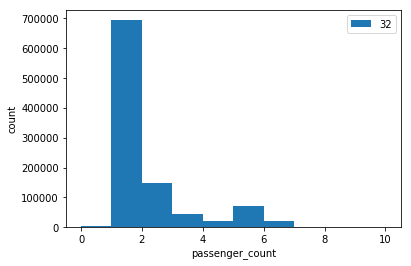

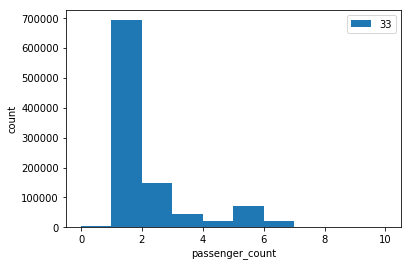

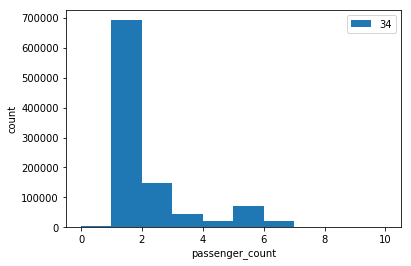

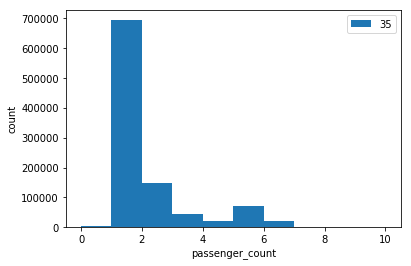

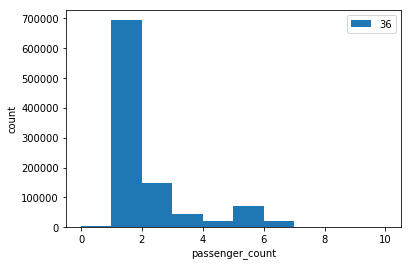

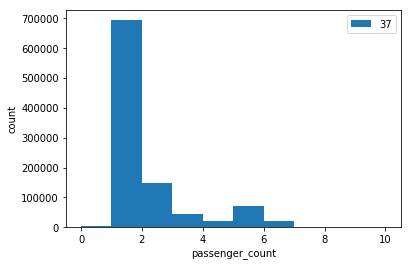

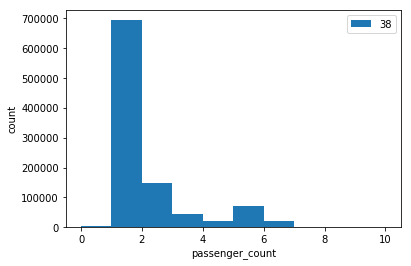

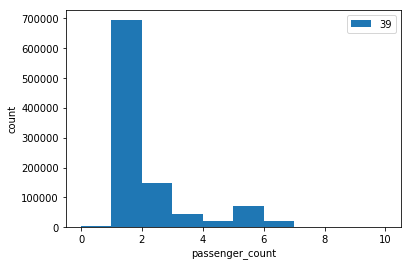

In [39]:
for i in range(20,40):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    plt.hist(df['passenger_count'], range=[0,10], label = str(i))
    plt.xlabel('passenger_count')
    plt.ylabel('count')
    plt.legend()   
    plt.show()

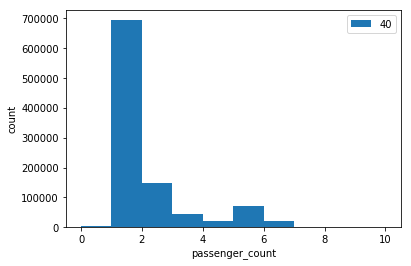

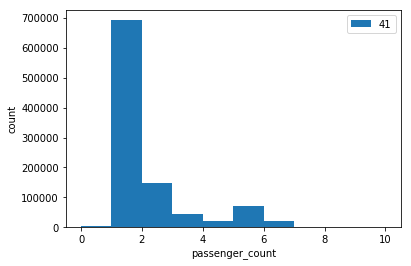

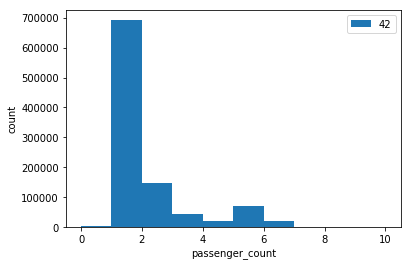

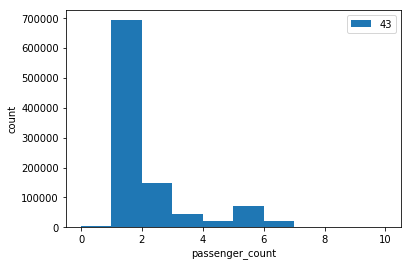

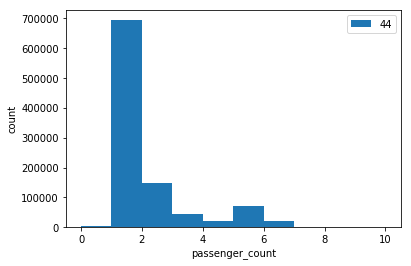

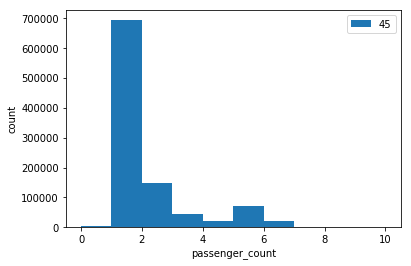

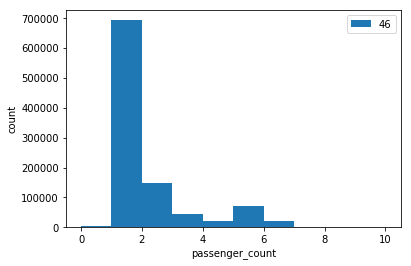

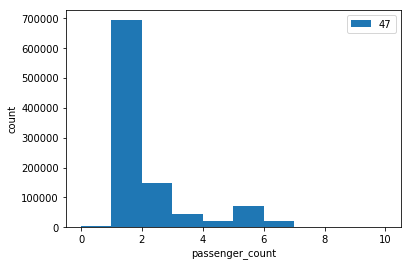

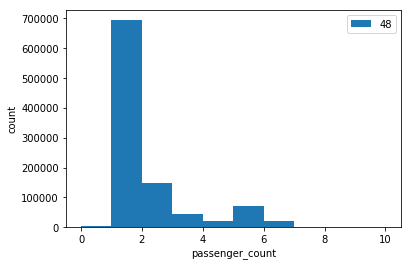

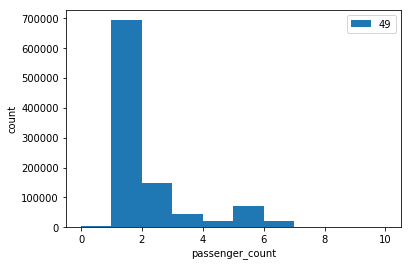

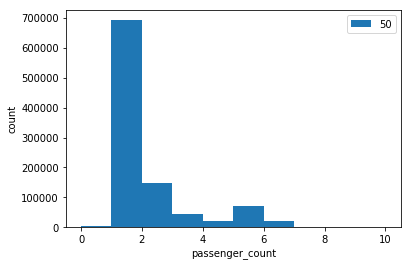

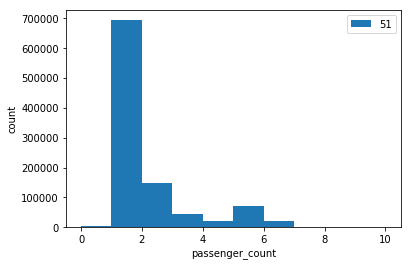

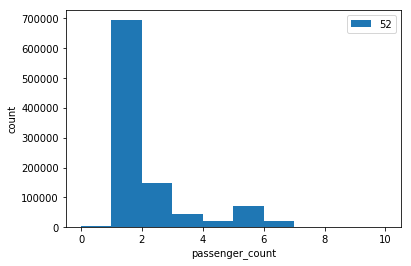

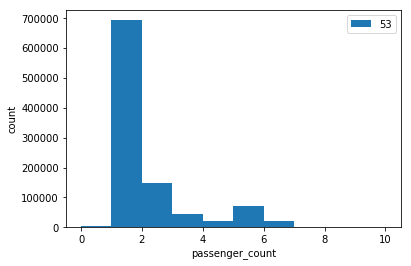

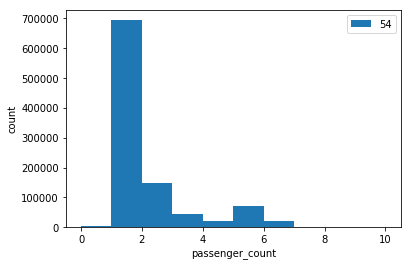

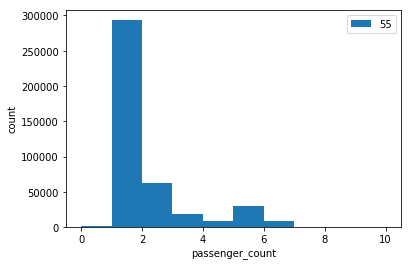

In [40]:
for i in range(40,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    plt.hist(df['passenger_count'], range=[0,10], label = str(i))
    plt.xlabel('passenger_count')
    plt.ylabel('count')
    plt.legend()   
    plt.show()

### We can infer from these plots that almost all of the chunks have passenger count in the range between 0 to 7. So restricting passenger_count in that range will remove outliers.

In [45]:
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df = df[df['passenger_count']<5]
    df = df[df['passenger_count']>=0]
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
    

### PREPROCESSING FOR FARE_AMOUNT

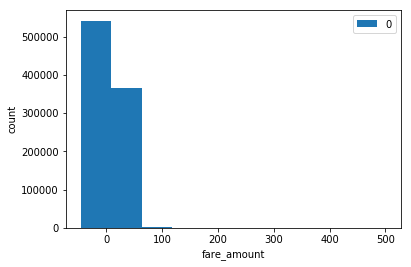

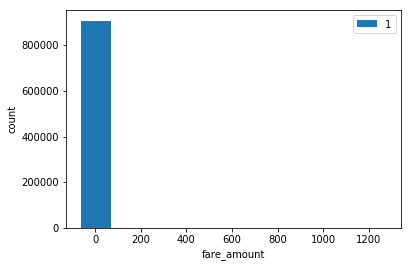

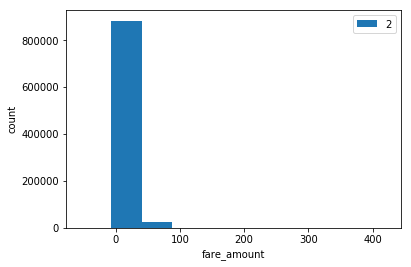

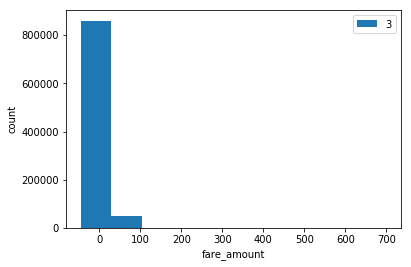

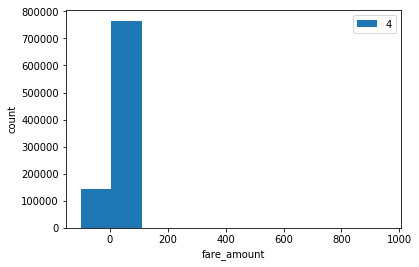

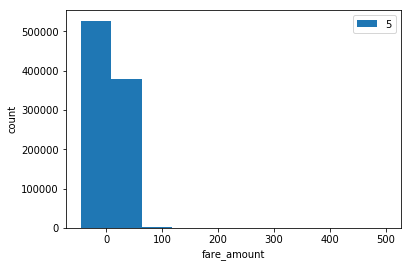

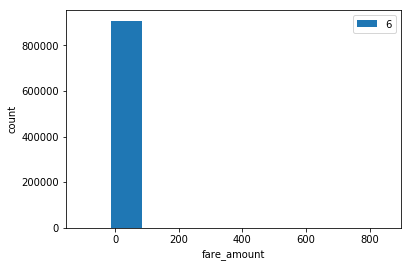

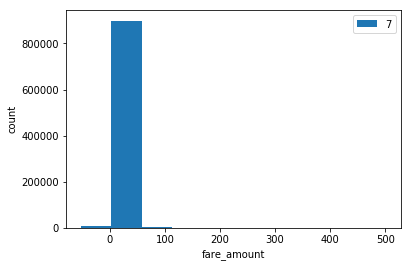

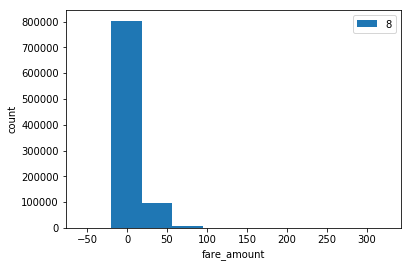

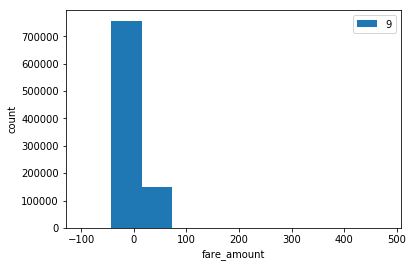

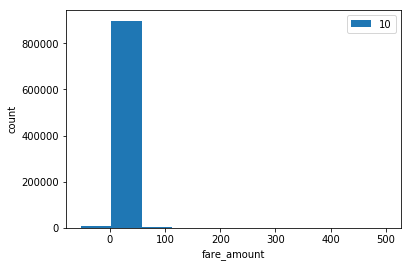

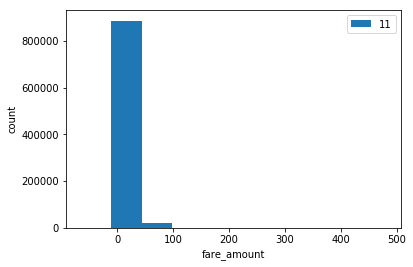

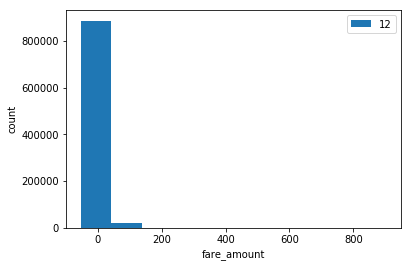

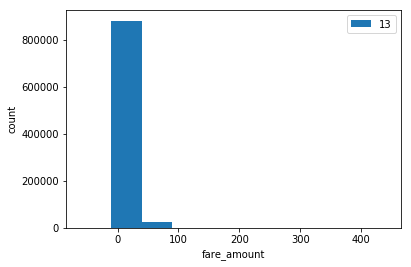

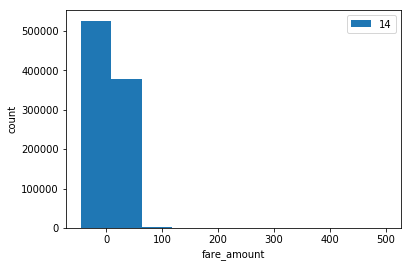

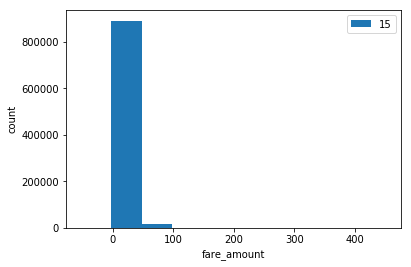

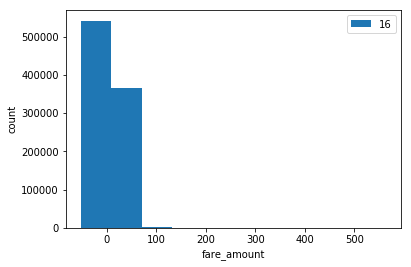

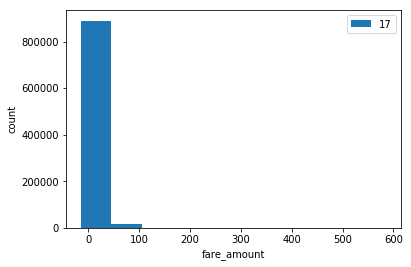

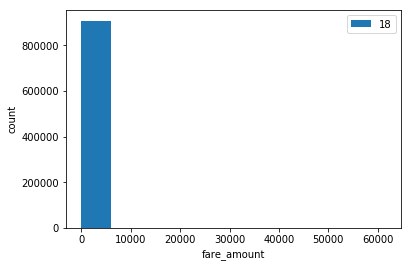

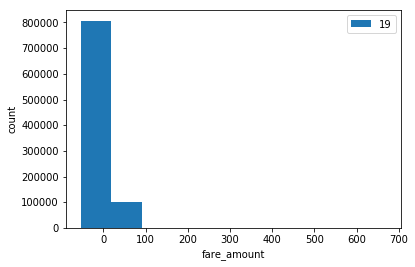

In [46]:
for i in range(0,20):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    plt.hist(df['fare_amount'], label = str(i))
    plt.xlabel('fare_amount')
    plt.ylabel('count')
    plt.legend()   
    plt.show()

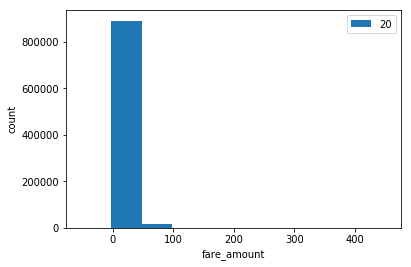

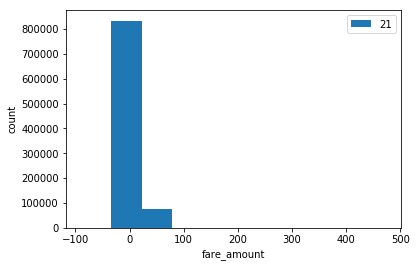

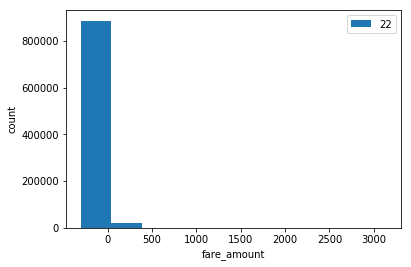

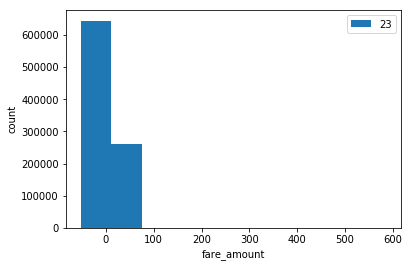

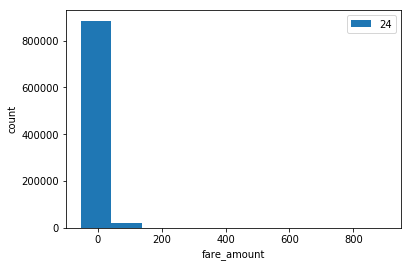

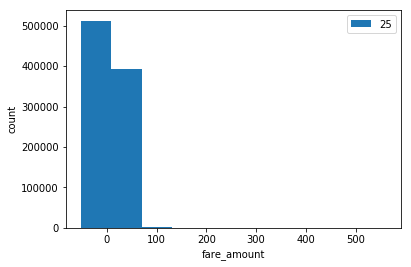

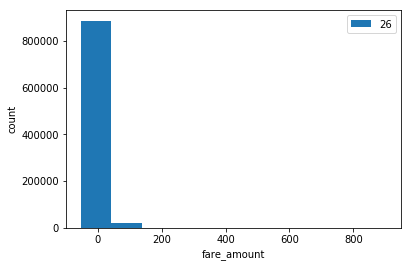

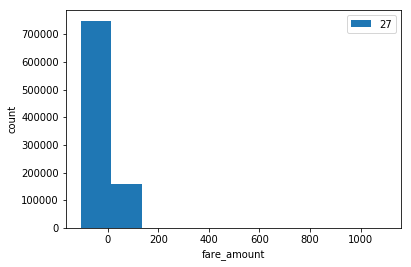

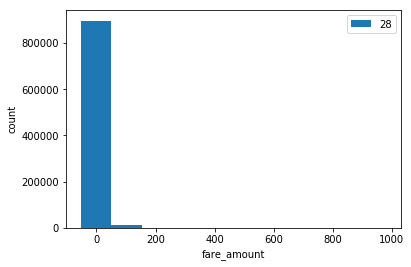

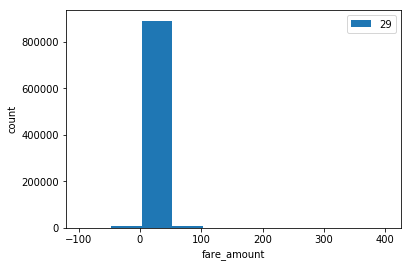

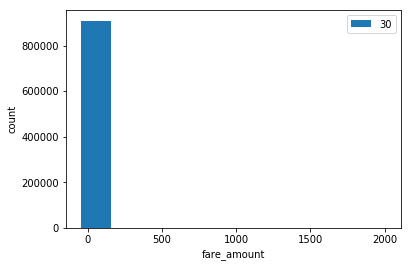

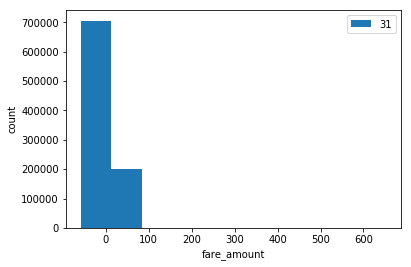

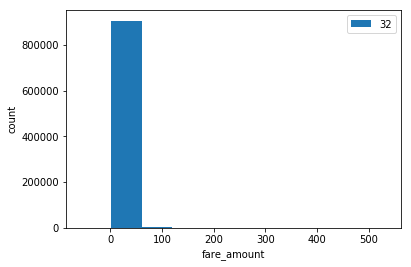

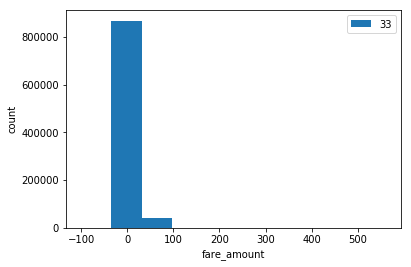

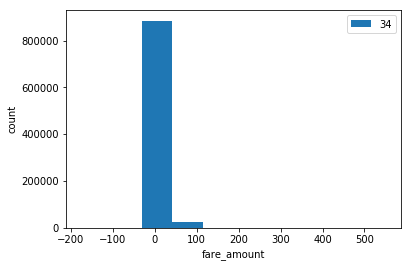

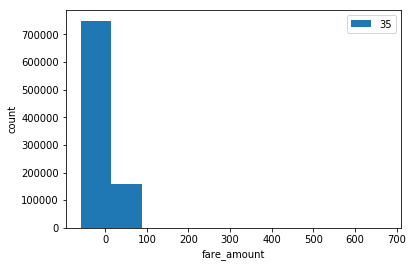

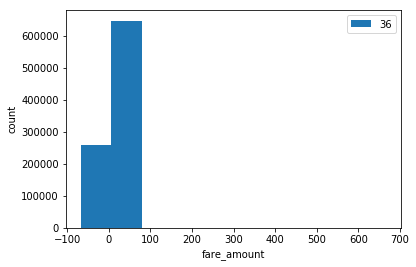

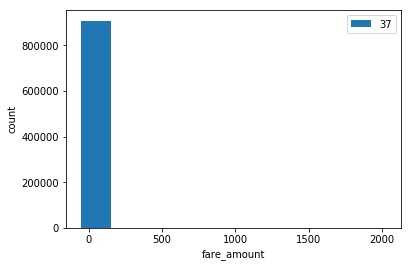

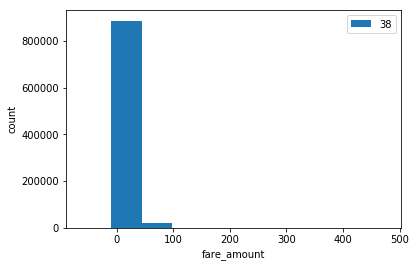

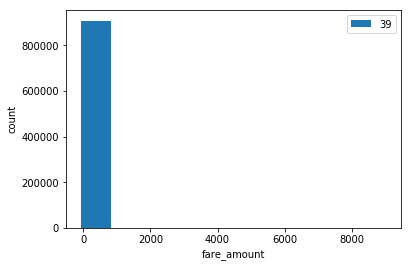

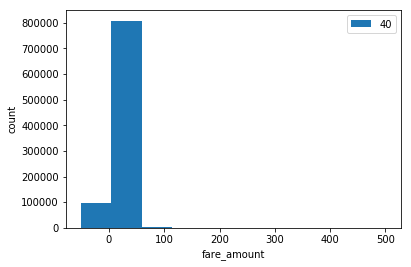

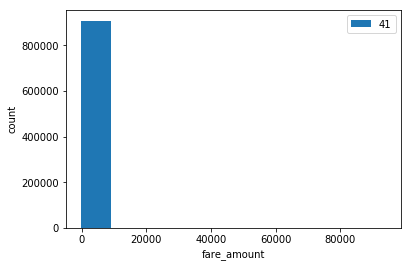

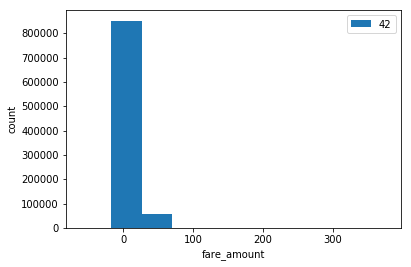

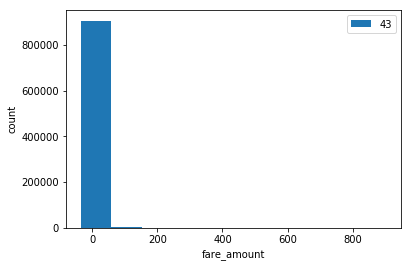

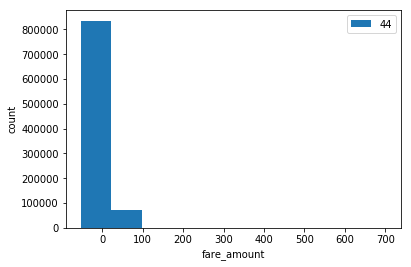

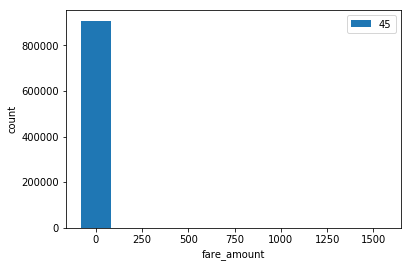

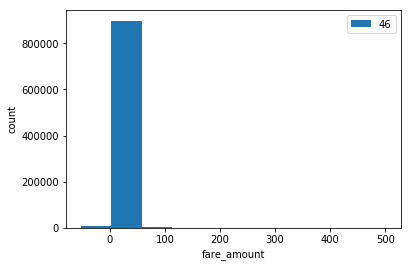

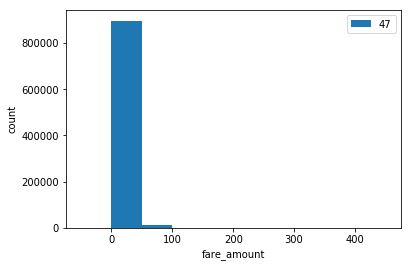

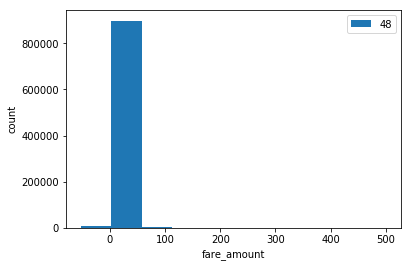

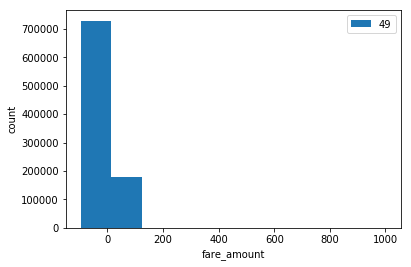

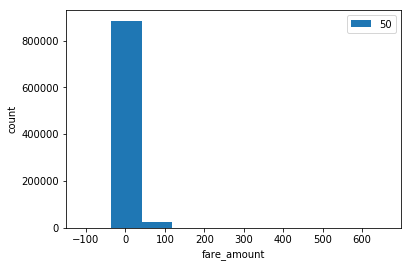

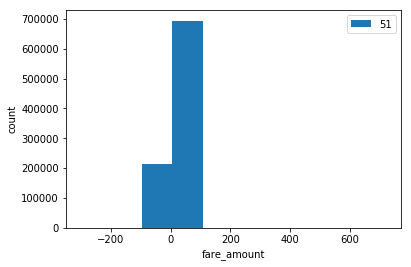

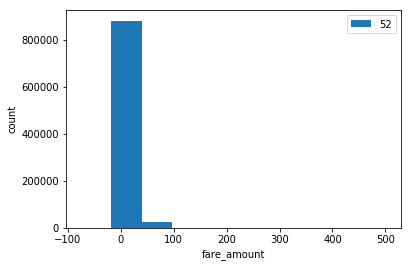

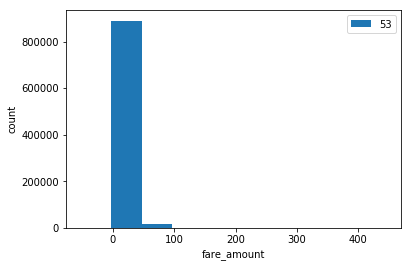

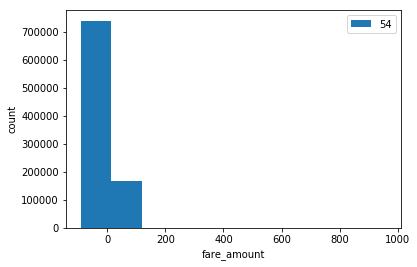

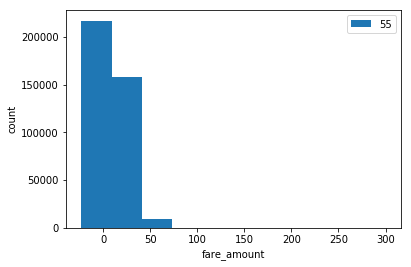

In [47]:
for i in range(20,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    plt.hist(df['fare_amount'], label = str(i))
    plt.xlabel('fare_amount')
    plt.ylabel('count')
    plt.legend()   
    plt.show()

### It can be concluded from above plots that fare amount for most of the chunks does not exceed 200 dollars. Also, some chunks have fare amount less than 0(which makes no sense). 

In [48]:
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df = df[df['fare_amount']<200]
    df = df[df['fare_amount']>=0]
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
    

In [54]:
null_count_fare = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_fare+=df['fare_amount'].isnull().sum(axis = 0)
print(null_count_fare)

0


In [55]:
null_count_passenger = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_passenger+=df['passenger_count'].isnull().sum(axis = 0)
print(null_count_passenger)

0


In [60]:
null_count_dropoff_latitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_dropoff_latitude+=df['dropoff_latitude'].isnull().sum(axis = 0)
print(null_count_dropoff_latitude)

376


In [61]:
null_count_dropoff_longitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_dropoff_longitude+=df['dropoff_longitude'].isnull().sum(axis = 0)
print(null_count_dropoff_longitude)

376


In [62]:
null_count_pickup_longitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_pickup_longitude+=df['pickup_longitude'].isnull().sum(axis = 0)
print(null_count_pickup_longitude)

0


In [63]:
null_count_pickup_latitude = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_pickup_latitude+=df['pickup_latitude'].isnull().sum(axis = 0)
print(null_count_pickup_latitude)

0


In [64]:
null_count_pickup_datetime = 0
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    null_count_pickup_latitude+=df['pickup_datetime'].isnull().sum(axis = 0)
print(null_count_pickup_datetime)

0


### Out of approximately 20million rows the number of rows with missing data is very very less. So, we can safely drop rows with any missing data.

In [66]:
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df["key"] = pd.to_datetime(df["key"])
    df.dropna(how='any',inplace = True)
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

### Introducing new features

In [67]:
def dist(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude):
    pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude = map(np.radians, [pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude])
    dlon = dropoff_longitude - pickup_longitude
    dlat = dropoff_latitude - pickup_latitude
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_latitude) * np.cos(dropoff_latitude) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6367 * c
    return distance


for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df['hour'] = df.key.dt.hour
    df['month'] = df.key.dt.month
    df['abs_longitude'] = abs(df['pickup_longitude'] - df['dropoff_longitude'])
    df['abs_latitude'] = abs(df['pickup_latitude'] - df['dropoff_latitude'])
    #distance travelled
    df['distance'] = dist(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])
    df['weekday'] = df.key.dt.weekday
    df['peak_hour'] = np.where((df['hour'] >= 16) &
                                (df['hour'] <= 20) & 
                                (df['weekday'] >=0) &
                                (df['weekday'] <=4) , 1, 0)
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()
    

### Plot correlation matrix to visualize the redundant features

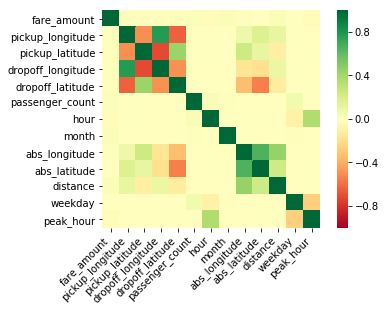

In [77]:
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap = "RdYlGn",
    square=True)
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

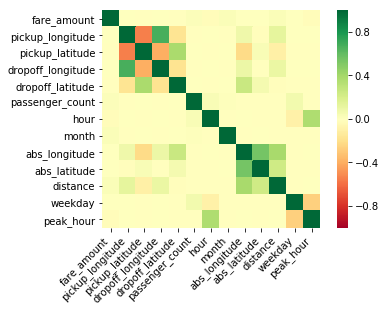

In [78]:
for i in range(1,2):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap = "RdYlGn",
    square=True)
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

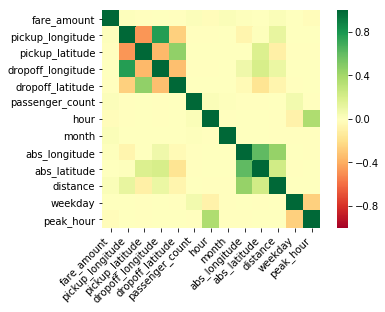

In [79]:
for i in range(45,46):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap = "RdYlGn",
    square=True)
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

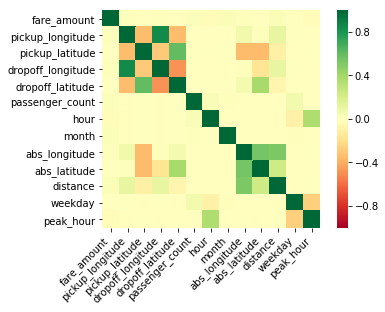

In [6]:
for i in range(50,51):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap = "RdYlGn",
    square=True)
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

### No two features are strongly correlated to each other in every chuck. So,  only dropping key and date_time feature. 

In [82]:
for i in range(0,56):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    df.drop(columns = 'key',inplace = True)
    df.drop(columns = 'pickup_datetime',inplace = True)
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'wb')
    pickle.dump(df, pickle_in)
    pickle_in.close()

### Deciding the optimal machine learning model
    

    

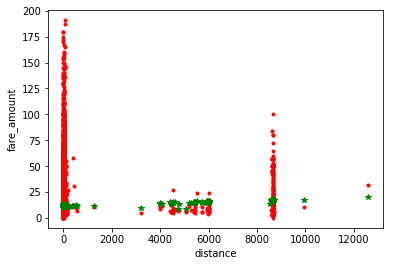

<Figure size 2160x1440 with 0 Axes>

Mean Squared Error : 93.67249770759538


In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    reg = LinearRegression().fit(X_train, y_train)
    plt.plot(X_test['distance'], y_test, '.',  c = 'red', label = 'actual')
    plt.plot(X_test['distance'] , reg.predict(X_test) , '*', c = 'green', label = 'predicted')
    plt.xlabel('distance')
    plt.ylabel('fare_amount')
    plt.figure(figsize=(30,20))
    plt.show() 
    print('Mean Squared Error :',mean_squared_error(y_test, reg.predict(X_test)))
    #print('Accuracy Score : ', sklearn.metrics.accuracy_score(y_test,  reg.predict(X_test),sample_weight=None))

    
    

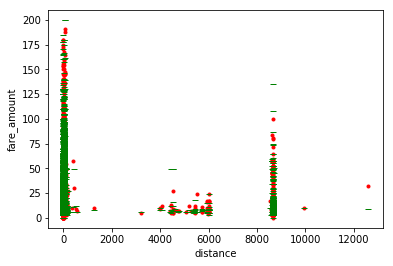

<Figure size 2160x1440 with 0 Axes>

Mean Squared Error : 34.86466212621942


In [71]:
for i in range(0,1):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    reg = DecisionTreeRegressor(random_state = 0)  
    reg.fit(X_train, y_train)
    plt.plot(X_test['distance'], y_test, '.',  c = 'red', label = 'actual')
    plt.plot(X_test['distance'] , reg.predict(X_test) , '_', c = 'green', label = 'predicted')
    plt.xlabel('distance')
    plt.ylabel('fare_amount')
    plt.figure(figsize=(30,20))
    plt.show() 
    print('Mean Squared Error :',mean_squared_error(y_test, reg.predict(X_test)))

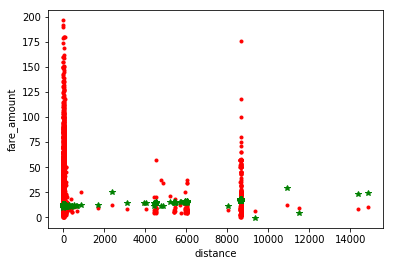

<Figure size 2160x1440 with 0 Axes>

Mean Squared Error : 94.45997753075008


In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
for i in range(1,2):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    reg = LinearRegression().fit(X_train, y_train)
    plt.plot(X_test['distance'], y_test, '.',  c = 'red', label = 'actual')
    plt.plot(X_test['distance'] , reg.predict(X_test) , '*', c = 'green', label = 'predicted')
    plt.xlabel('distance')
    plt.ylabel('fare_amount')
    plt.figure(figsize=(30,20))
    plt.show() 
    print('Mean Squared Error :',mean_squared_error(y_test, reg.predict(X_test)))
    #print('Accuracy Score : ', sklearn.metrics.accuracy_score(y_test,  reg.predict(X_test),sample_weight=None))

    
    

### Clearly Decision trees are performing much better than Linear Regression. So we will use Decision Trees for training.

In [99]:
depth = []
mse = []
for i in range(1,2):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    for j in range(5,15):
        reg = DecisionTreeRegressor(random_state = 0, max_depth = j)  
        reg.fit(X_train, y_train)
        depth.append(j)
        mse.append(mean_squared_error(y_test, reg.predict(X_test)))
        

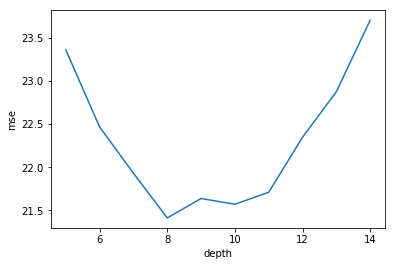

<Figure size 2160x1440 with 0 Axes>

In [87]:
plt.plot(depth,mse)
plt.xlabel('depth')
plt.ylabel('mse')
plt.figure(figsize=(30,20))
plt.show() 


In [88]:
depth = []
mse = []
for i in range(2,3):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    for j in range(5,15):
        reg = DecisionTreeRegressor(random_state = 0, max_depth = j)  
        reg.fit(X_train, y_train)
        depth.append(j)
        mse.append(mean_squared_error(y_test, reg.predict(X_test)))

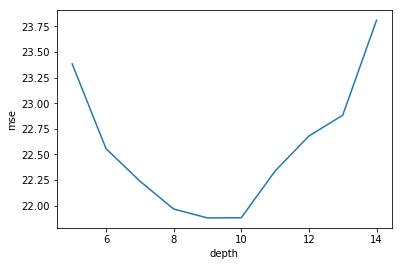

<Figure size 2160x1440 with 0 Axes>

In [89]:
plt.plot(depth,mse)
plt.xlabel('depth')
plt.ylabel('mse')
plt.figure(figsize=(30,20))
plt.show() 

In [93]:
depth = []
mse = []
for i in range(20,21):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    for j in range(5,15):
        reg = DecisionTreeRegressor(random_state = 0, max_depth = j)  
        reg.fit(X_train, y_train)
        depth.append(j)
        mse.append(mean_squared_error(y_test, reg.predict(X_test)))

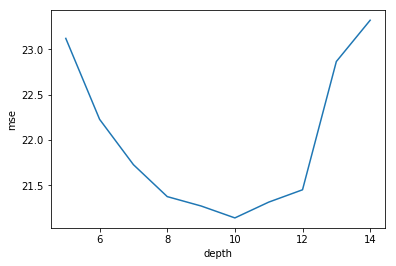

<Figure size 2160x1440 with 0 Axes>

In [94]:
plt.plot(depth,mse)
plt.xlabel('depth')
plt.ylabel('mse')
plt.figure(figsize=(30,20))
plt.show() 

In [95]:
depth = []
mse = []
for i in range(30,31):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    for j in range(5,15):
        reg = DecisionTreeRegressor(random_state = 0, max_depth = j)  
        reg.fit(X_train, y_train)
        depth.append(j)
        mse.append(mean_squared_error(y_test, reg.predict(X_test)))

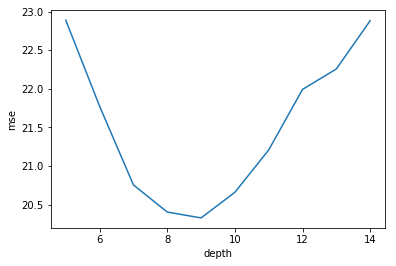

<Figure size 2160x1440 with 0 Axes>

In [96]:
plt.plot(depth,mse)
plt.xlabel('depth')
plt.ylabel('mse')
plt.figure(figsize=(30,20))
plt.show() 

In [97]:
depth = []
mse = []
for i in range(40,41):
    pickle_in = open('/Users/shiksharawat/Desktop/pickles/fiddy_states.pickle'+ str(i) ,'rb')
    df = pickle.load(pickle_in)
    target = df['fare_amount']
    df.drop(columns = 'fare_amount',inplace = True)
    X_train, X_test, y_train, y_test= train_test_split(df, target , random_state=111)
    for j in range(5,15):
        reg = DecisionTreeRegressor(random_state = 0, max_depth = j)  
        reg.fit(X_train, y_train)
        depth.append(j)
        mse.append(mean_squared_error(y_test, reg.predict(X_test)))

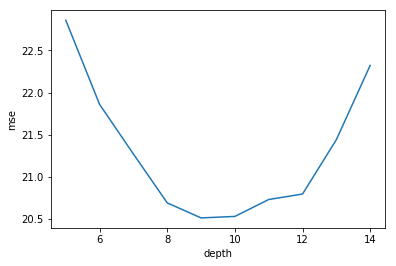

<Figure size 2160x1440 with 0 Axes>

In [98]:
plt.plot(depth,mse)
plt.xlabel('depth')
plt.ylabel('mse')
plt.figure(figsize=(30,20))
plt.show() 

### The minima for mse lies between 8-10 of max_depth for different chunks. So, we will take max_depth parameter as 9.